# Adaptive - Ijsselmeer

Author: Luciano Raso, Delft University of Technology, Delft, The Netherlands. Section of Policy Analysis  
email: l.raso@tudelft.nl

In [1]:
cd ..

/Users/lraso/Documents/working directories/Monitoring_for_DAPP/Experiments


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import ast
from pathways.pathways import get_policy_def, find_pathway
from ema_workbench import load_results


plt.style.use('default')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Load data

In [3]:
# load data from EMA
results_df = pd.read_csv('data/Ijsselmeer/2018_10_18_results.csv',index_col=0)
len(results_df)
results_df.head()

2744

,low_flow_shift,peak_inflow_multiplier,sea_level_shift,pump_capacity,sluices_widening,summer_target,scenario_id,policy,model,demand deficit relative,dike failure frequency
0,0.0,1.0,0.000000,0,1,-0.2,0,"{'pump_capacity': 0, 'summer_target': -0.2, 's...",Ijsselmeer,0.014309,3714.848248
1,0.0,1.0,0.166667,0,1,-0.2,1,"{'pump_capacity': 0, 'summer_target': -0.2, 's...",Ijsselmeer,0.014309,3009.328920
2,0.0,1.0,0.333333,0,1,-0.2,2,"{'pump_capacity': 0, 'summer_target': -0.2, 's...",Ijsselmeer,0.014309,2034.670790
3,0.0,1.0,0.500000,0,1,-0.2,3,"{'pump_capacity': 0, 'summer_target': -0.2, 's...",Ijsselmeer,0.014201,1488.848525
4,0.0,1.0,0.666667,0,1,-0.2,4,"{'pump_capacity': 0, 'summer_target': -0.2, 's...",Ijsselmeer,0.014001,1052.332495


In [4]:
actions = [{'caption':'pump_capacity', 'color': 'red'},
           {'caption':'summer_target', 'color': 'blue'},
           {'caption':'sluices_widening', 'color': 'yellow'}]

In [5]:
pathways = []
for i, action_j in enumerate(actions):
    for i in range(len(actions)):
        pathways.append({'caption': action_j['caption'] +' + '+actions[i]['caption'] })

In [6]:
objectives = ['dike failure frequency','demand deficit relative']

In [7]:
decreasing_actions = []#['winter_target'] # list actions whose effectiveness increase with decreasing of action value, default increasing
actions_order = {}
for action in actions:
    direction = -1 if action in decreasing_actions else 1
    action['values'] = np.sort(results_df[action['caption']].unique())[::direction].tolist()

In [8]:
# var new_var correspondence
name_crit_unc ={'low_flow_shift':'low flow reduction $[m^3/s]$',
      'peak_inflow_multiplier': 'max discharge increase $[\%]$ ',
      'sea_level_shift': 'sea level rise $[m]$',
      'wind_multiplier' : 'change wind speed, $[\%]$ '}
     # 'winter_target': 'winter target level $[mNAP]$',}
    
    

In [9]:
# rename
old_var_name = results_df.columns.copy(deep=True)
new_var_name = [ name_crit_unc[var] if var in name_crit_unc else var for var in old_var_name  ]
results_df.columns = new_var_name

### define scenarios data

In [19]:
n_critical_uncertainties = len(set(new_var_name) - set(old_var_name))
scenarios_df = results_df.iloc[results_df['scenario_id'].unique(),0:n_critical_uncertainties]
scenarios_df.shape

(343, 3)

### Define policy success

In [11]:
policy_success_threshold = {}
policy_success_threshold['dike failure frequency'] = 1900
policy_success_threshold['demand deficit relative'] = 0.02 # 10 %

sign = {} # negative is the objective to be minimized, positive if to be maximized 
sign['dike failure frequency'] = -1
sign['demand deficit relative'] = +1

### Identify policy success scenarios

In [12]:
policy_success = pd.DataFrame(results_df[['policy','scenario_id']])
for objective in objectives:
    policy_success[objective] = sign[objective] * results_df[objective] <= sign [objective] * policy_success_threshold[objective]

#### overall success of policy success is if all criteria are satisfied 

In [13]:
policy_success['overall']= policy_success[objectives].all(axis=1)

#### Rearrange data in scenarios (rows) vs policies (columns)

In [14]:
success_per_policy = policy_success.pivot(columns='policy', values='overall', index='scenario_id')   

In [15]:
success_per_policy.sum()

policy
{'pump_capacity': 0, 'summer_target': -0.2, 'sluices_widening': 1}       66
{'pump_capacity': 0, 'summer_target': -0.2, 'sluices_widening': 2}      202
{'pump_capacity': 0, 'summer_target': 0.2, 'sluices_widening': 1}       122
{'pump_capacity': 0, 'summer_target': 0.2, 'sluices_widening': 2}       262
{'pump_capacity': 500, 'summer_target': -0.2, 'sluices_widening': 1}    231
{'pump_capacity': 500, 'summer_target': -0.2, 'sluices_widening': 2}    231
{'pump_capacity': 500, 'summer_target': 0.2, 'sluices_widening': 1}     305
{'pump_capacity': 500, 'summer_target': 0.2, 'sluices_widening': 2}     301
dtype: int64

### Exploratory data analysis

{'pump_capacity': 500, 'summer_target': 0.2, 'sluices_widening': 2}


/Users/lraso/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/lraso/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Text(0.5,1,"{'pump_capacity': 500, 'summer_target': 0.2, 'sluices_widening': 2}")

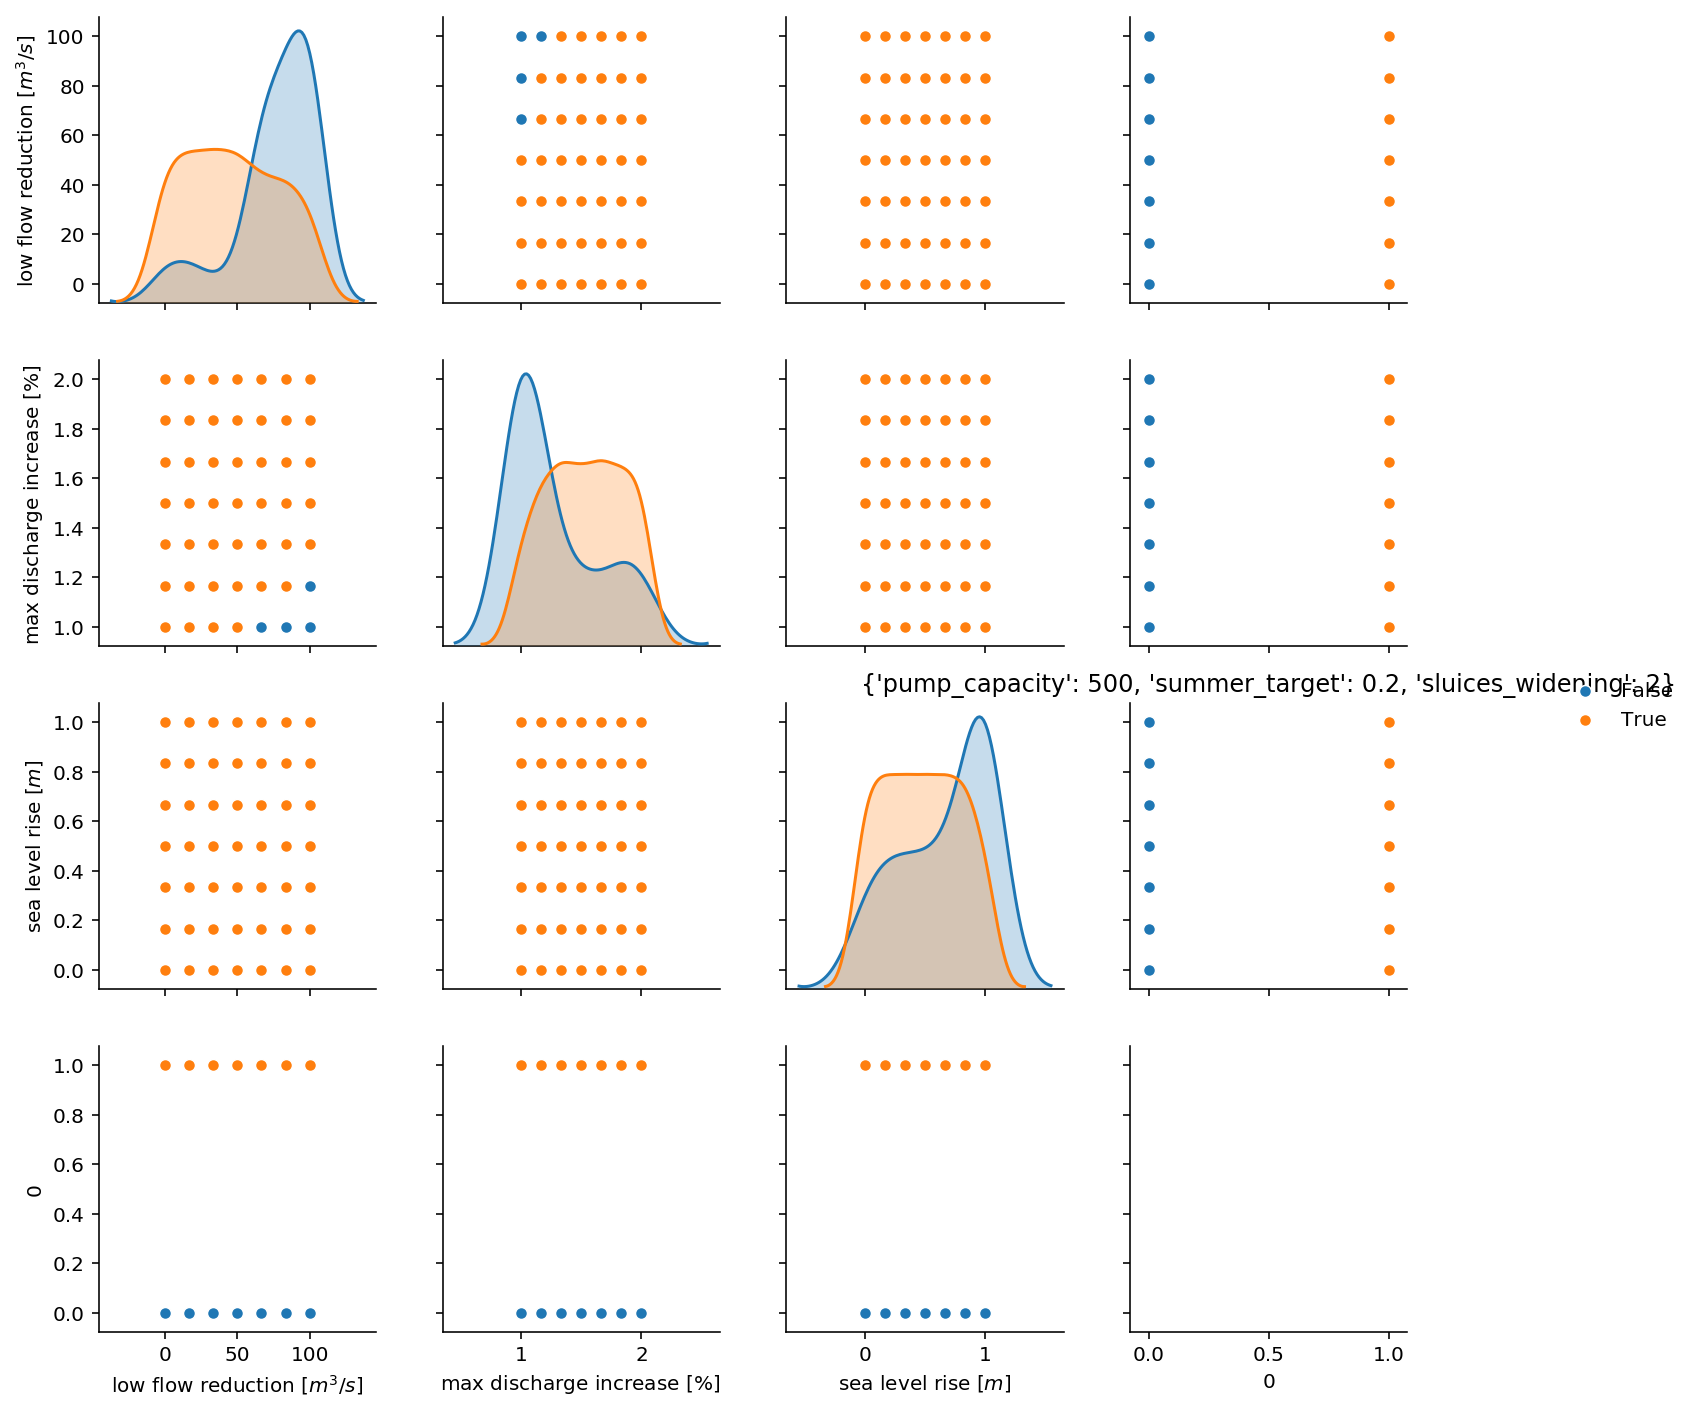

In [16]:
# plot_area_success
policy = success_per_policy.columns
pos = -1
print(policy[pos])
policy_under_analysis = pd.DataFrame(success_per_policy.iloc[:,pos].rename(columns={policy[pos]:'policy'}))
                                                              
scenarios_df_success = scenarios_df.join(policy_under_analysis)
    
sns.pairplot(scenarios_df_success,hue=0)
plt.title(policy[pos])

In [17]:
policies

NameError: name 'policies' is not defined

#### Policy colors setting

In [ ]:
policy_color = {"{'pump_capacity': 0, 'summer_target': -0.2, 'sluices_widening': 2}":'',
 "{'pump_capacity': 500, 'summer_target': 0.2, 'sluices_widening': 1}":'',
 "{'pump_capacity': 500, 'summer_target': 0.2, 'sluices_widening': 2}":'',
 "{'pump_capacity': 0, 'summer_target': 0.2, 'sluices_widening': 1}":'blue',
 "{'pump_capacity': 0, 'summer_target': -0.2, 'sluices_widening': 1}":'gray',
 "{'pump_capacity': 500, 'summer_target': -0.2, 'sluices_widening': 1}":'red',
 "{'pump_capacity': 500, 'summer_target': -0.2, 'sluices_widening': 2}":'',
 "{'pump_capacity': 0, 'summer_target': 0.2, 'sluices_widening': 2}":''}

In [ ]:
list_policies = list(policies.keys())
list_policies

In [ ]:
policy_ua = [list_policies[i] for i in [0,2]]
policy_color = dict(zip(policy_ua,['gray','red','green']))
policy_ua,policy_color

In [ ]:
var1 = 'sea_level_shift'
var2 = 'peak_inflow_multiplier'

policy = "{'winter_target': -0.4, 'sluices_widening': 1}"

#for policy in policies:
for policy in policy_ua:
    
    scenarios_vs_success = scenarios_df.join(success_per_policy[policy].apply(int))
    pivoted_success = scenarios_vs_success.pivot_table(index=var1,columns=var2,values=policy,aggfunc=np.sum) 
    pivoted_total = scenarios_vs_success.pivot_table(index=var1,columns=var2,values=policy,aggfunc='count')
    frequency_success = pivoted_success / pivoted_total
    # plotting
    x,y = frequency_success.index, frequency_success.columns
    X,Y = np.meshgrid(x,y)
    levelsf=[0.2,1]
    levels=[0.2,0.5,0.8]
    linestyles = ['dotted','solid','dotted']
    #plt1 = plt.contourf(X, Y, frequency_success.values,levelsf,label=policy,colors=policy_color[policy],linestyles = linestyles, linewidth = 5 ,alpha=0.4)#, cmap=plt.cm.jet);
    plt2 = plt.contour(X, Y, frequency_success.values,levels,label=policy,colors=policy_color[policy],linestyles = linestyles, linewidth = 5 )#, cmap=plt.cm.jet);
    
plt.xlabel(var1)
plt.ylabel(var2)


In [ ]:
scenarios_vs_success[var1].unique()
var1

In [ ]:
frequency_success

### Define pathways 
#### ($\forall$ policy)

In [ ]:
for policy in policies:
    print(policy)
    policies[policy]['pathways'] = find_pathway(policy,policies,actions_order)
    print(policies[policy]['pathways'])

### Identify pathways success scenarios

In [ ]:
success_per_pathway = success_per_policy.copy()

for policy in success_per_policy:
    success_per_pathway[policy] = success_per_policy[policies[policy]['pathways']].any(axis=1)

In [20]:
success_per_policy.head(25)
success_per_pathway.head(25)

policy,"{'pump_capacity': 0, 'summer_target': -0.2, 'sluices_widening': 1}","{'pump_capacity': 0, 'summer_target': -0.2, 'sluices_widening': 2}","{'pump_capacity': 0, 'summer_target': 0.2, 'sluices_widening': 1}","{'pump_capacity': 0, 'summer_target': 0.2, 'sluices_widening': 2}","{'pump_capacity': 500, 'summer_target': -0.2, 'sluices_widening': 1}","{'pump_capacity': 500, 'summer_target': -0.2, 'sluices_widening': 2}","{'pump_capacity': 500, 'summer_target': 0.2, 'sluices_widening': 1}","{'pump_capacity': 500, 'summer_target': 0.2, 'sluices_widening': 2}"
scenario_id,,,,,,,,
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,False,False,True,True,True,True,True
5,False,False,False,True,True,True,True,True
6,False,False,False,False,True,True,True,True
7,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True


NameError: name 'success_per_pathway' is not defined

### Identify pathway success region by scenario discovery 

In [ ]:
success_per_policy.sum()
success_per_pathway.sum()

### Identify adaptation tipping point

#### Use of Classification Tree (CART)

In [ ]:
from sklearn import tree
tree_decision = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)

In [ ]:
adaptation_tree={}
features = {}
thresholds = {}
for policy in policies:
    adaptation_tree[policy] = tree_decision.fit(scenarios_df,success_per_policy[policy])
    features[policy] = adaptation_tree[policy].tree_.feature
    thresholds[policy] = adaptation_tree[policy].tree_.threshold

#### Use of Range Search (PRIM)

In [ ]:
from ema_workbench.analysis import prim
prim_classifier = lambda x, y: prim.Prim(x=x.to_records(index=False), y=y.values,threshold = 0.5)

In [ ]:
x = scenarios_df.to_records(index=False)
y = success_per_policy.iloc[:,pos].values

In [ ]:
prim_alg = prim.Prim(x, y, threshold=0.999)
#box1.show_tradeoff()

In [ ]:
box1 = prim_alg.find_box()



In [ ]:
box1.show_tradeoff()

In [ ]:
box_id=None
box_res = box1.inspect(box_id)
box_res2 = box1.inspect(box_id,style='graph')


In [ ]:
print(box_res)

In [ ]:
box_res2

In [ ]:
box.show_tradeoff()
plt.show()

In [ ]:
pos_i = 43
box.inspect(pos_i)
box.inspect(pos_i, style='graph')
plt.show()

In [ ]:
policy

In [ ]:
scenarios_df.columns[features[policy]]

In [ ]:
clf = adaptation_tree[policy]
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
classes = clf.classes_
n_cases = clf.tree_.weighted_n_node_samples

#### Features importance

In [ ]:
feature_importance = pd.Series(clf.feature_importances_,index=scenarios_df.columns)
feature_importance.plot(kind='barh',title='Feature Importance')

### Rendering adaptation pathways
#### Creating xml to be loaded within the [Pathways Generator](https://publicwiki.deltares.nl/display/AP/Pathways+Generator) by [Deltares](www.deltares/nl)

In [ ]:
from pathways import create_patwhays_map

In [ ]:
create_patwhays_map(actions+pathways)

In [ ]:
import graphviz 
from graphviz_tree import *

In [ ]:
test_new = False
if test_new == True:
    export_graphviz_func = export_graphviz_temp
else:
    export_graphviz_func = tree.export_graphviz

In [ ]:
policies_names = []
for policy in policy_success_ordinal.columns:
    policies_names.append(policy.replace(',','\n'))

In [ ]:
class_names = list(policy_success_ordered.columns)
class_names.append('None')
class_names = [policy_name.replace(',','\n') for policy_name in class_names ]

In [ ]:
pathways = export_graphviz_func(clf, out_file=None, #max_depth=4,
                                feature_names=scenarios_df.columns, 
                                class_names=class_names, 
                                filled=True,
                                label = 'all',
                                leaves_parallel =False,
                                #node_ids=True,
                                #rounded=True,
                                #impurity = True, 
                                #proportion = True,
                                rotate = True,
                                precision = 3
                                #,minimal_info=True
                               )  
pathways_rendered = graphviz.Source(pathways)
pathways_rendered

In [ ]:

cmap_name = 'my_list'
for n_bin, ax in zip(n_bins, axs.ravel()):
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im)

In [ ]:
import pylab as pl
from matplotlib.colors import LinearSegmentedColormap


max_cost = 340 * 1.3
a = np.array([[0,max_cost]])
pl.figure(figsize=(3, 10))

colors = [(0, 0.7, 0),(0.7, 0, 0)]  # G -> R
n_bins = 30
color_map = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
img = pl.imshow(a, cmap=color_map)
pl.gca().set_visible(False)
cax = pl.axes([0, 1, 0.1, 1])
pl.colorbar(cax=cax)
plt.ylabel('Cost $[M- euro]$')
pl.savefig("colorbar.pdf")


In [ ]:
cost_policy = 100
color_for_policy = color_map(cost_policy/max_cost)[0:3]
color_for_policy

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
clf_iris = tree.DecisionTreeClassifier()
clf_iris.fit(iris.data, iris.target)


In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
iris.target_names

In [ ]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
from sklearn.datasets import load_iris


iris = load_iris()

plt.figure(figsize=(10,7))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
        
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc=0)
#plt.axis("tight")